In [2]:
#Importing the necessary packages and libaries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] =(15,11.5)

import numpy as np
import pandas as pd

/home/ashish/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [3]:
data= pd.read_csv('fcc_hcp_dmd.csv')
data = data.values


In [4]:
X = data[1:,1:]
y = data[1:,0]
#print(X)
#print(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 42)

In [6]:
linear = svm.SVC(kernel='linear', C=300, decision_function_shape='ovo',random_state=109).fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=10, C=200, decision_function_shape='ovo',random_state=109).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=150, decision_function_shape='ovo',random_state=109).fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=150, decision_function_shape='ovo').fit(X_train, y_train)

In [7]:
#stepsize in the mesh, it alters the accuracy of the plotprint
#to better understand it, just play with the value, change it and print it
h = .01#create the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))# create the title that will be shown on the plot
titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']


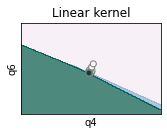

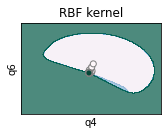

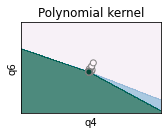

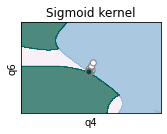

In [8]:
for i, clf in enumerate((linear, rbf, poly, sig)):
    #defines how many plots: 2 rows, 2columns=> leading to 4 plots
    plt.subplot(2, 2, i + 1) #i+1 is the index
    #space between plots
    plt.subplots_adjust(wspace=0.4, hspace=0.4)    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.7)    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.PuBuGn,  edgecolors='grey')    
    plt.xlabel('q4')
    plt.ylabel('q6')
    #plt.xlim(10**-8, 10**-2)
    #plt.ylim(10**-8, 10**-2)
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()

In [9]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print('Accuracy Linear Kernel:', accuracy_lin)
print('Accuracy Polynomial Kernel:', accuracy_poly)
print('Accuracy Radial Basis Kernel:', accuracy_rbf)
print('Accuracy Sigmoid Kernel:', accuracy_sig)# creating a confusion matrix
cm_lin = confusion_matrix(y_test, linear_pred)
cm_poly = confusion_matrix(y_test, poly_pred)
cm_rbf = confusion_matrix(y_test, rbf_pred)
cm_sig = confusion_matrix(y_test, sig_pred)
print(cm_lin)
print(cm_poly)
print(cm_rbf)
print(cm_sig)

Accuracy Linear Kernel: 0.4714285714285714
Accuracy Polynomial Kernel: 0.5428571428571428
Accuracy Radial Basis Kernel: 0.7214285714285714
Accuracy Sigmoid Kernel: 0.8071428571428572
[[23 33  0]
 [ 0 43  0]
 [ 0 41  0]]
[[34 22  0]
 [ 1 42  0]
 [ 0 41  0]]
[[38 18  0]
 [ 1 22 20]
 [ 0  0 41]]
[[44 12  0]
 [ 8 28  7]
 [ 0  0 41]]


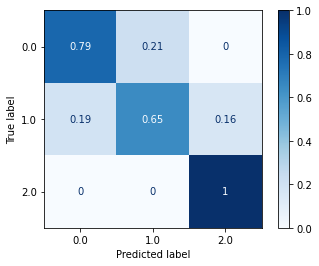

In [11]:
from sklearn.metrics import plot_confusion_matrix

predictions = clf.predict(X_test)

# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
#plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()